# Set environment

In [1]:
##############################################################
import numpy as np
import pandas as pd
import os, re
import pickle
import matplotlib.pyplot as plt

##############################################################
FP_LGG = "/data/Duke_BIOS824/LGG-segmentation/"
FP_OUT = "/data/Duke_BIOS824/res_proj01/"
#FP_DAT = "/home/clint/GitRepo/Duke_BIOS824_Proj1/data/"
patients = [x for x in os.listdir(FP_LGG) if "TCGA" in x]    

In [2]:
%matplotlib inline

# helper function

In [3]:
def get_fname(patient, is_mask = False):
    """get the list of file names for each patient id"""
    fpath = os.path.join(FP_LGG, patient)
    if is_mask:
        pattern = "_([^_]*)_mask.tif$"
        fname = np.array([x for x in os.listdir(fpath) if "mask" in x])
    else:
        pattern = "_([^_]*).tif$"
        fname = np.array([x for x in os.listdir(fpath) if "mask" not in x])
    index = np.array([int(re.findall(pattern, x)[0]) for x in fname])
    idx = np.argsort(index)
    return fname[idx]

def reaxes_img(img):
    """swap axes 2 -> 0 -> 1 -> 2"""
    img = img.copy()
    img = np.swapaxes(img,0,1)
    img = np.swapaxes(img,1,2)
    return img

# read in the data

In [4]:
### initialization
img_slice, img_mask = dict(), dict()

### read in each patient and store
for patient in patients:
    ### read slices
    lst = get_fname(patient, is_mask = False)
    img = [plt.imread(os.path.join(FP_LGG, patient, fname)) for fname in lst]
    img_slice[patient]  = np.array(reaxes_img(img))
    
    ### read mask
    lst = get_fname(patient, is_mask = True)
    img = [plt.imread(os.path.join(FP_LGG, patient, fname)) for fname in lst]
    img_mask[patient]  = np.array(reaxes_img(img))    

check number of patients

In [5]:
print(len(img_slice))
print(len(img_mask))

110
110


check the dimension images stored for each patient

In [6]:
patient = patients[0]
slices = img_slice[patient]
print(slices.shape)

(256, 256, 23, 3)


# Quick visualization

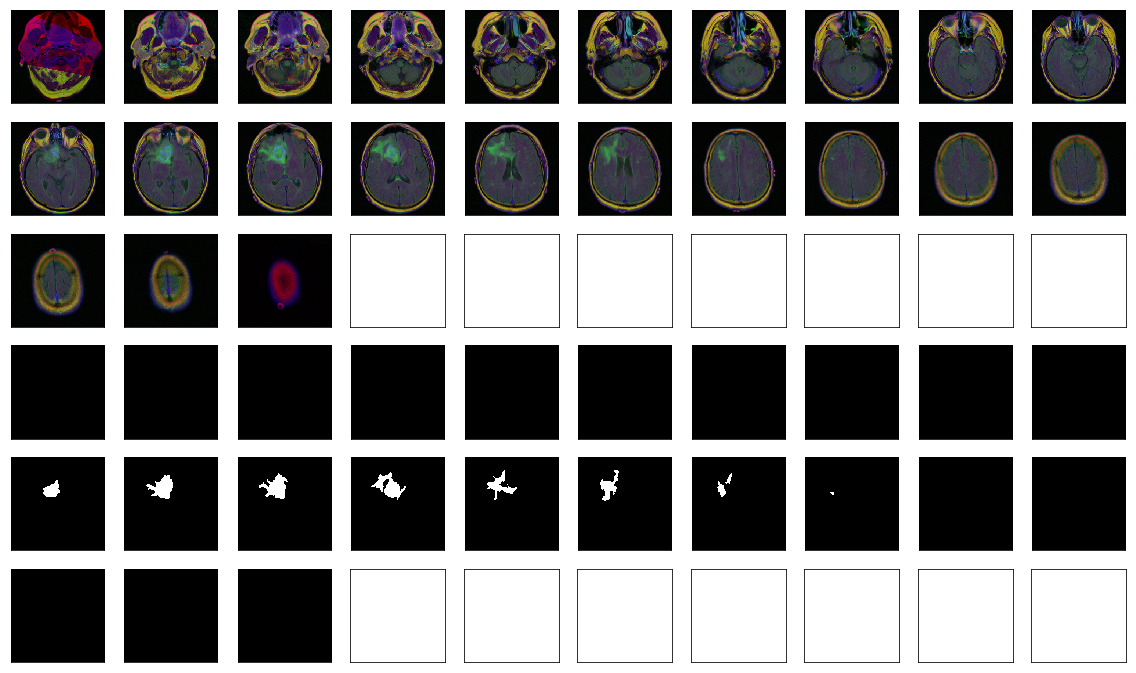

In [7]:
patient = patients[0]

fig, axes = plt.subplots(ncols=10, nrows=6, figsize = (2*10, 2*6))
slices = img_slice[patient]
masks  = img_mask[patient]
num_img = slices.shape[2]

for idx in range(num_img):
    ax = axes[idx // 10, idx % 10]
    ax.imshow(slices[:, :, idx], cmap = "gray")
    #axes[idx].set_xticks([])
    #axes[idx].set_yticks([])

for idx in range(num_img):
    ax = axes[idx // 10 + 3, idx % 10]
    ax.imshow(masks[:, :, idx], cmap = "gray")
    
plt.setp(axes, xticks=[], yticks=[])
plt.show()

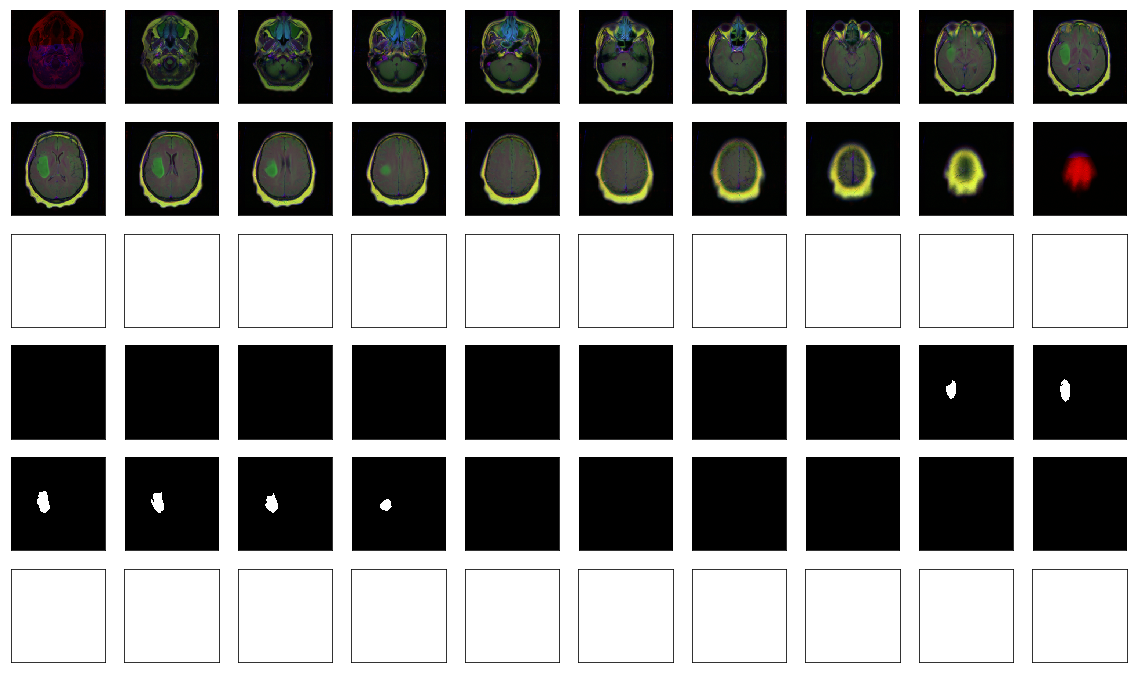

In [8]:
patient = patients[1]

fig, axes = plt.subplots(ncols=10, nrows=6, figsize = (2*10, 2*6))
slices = img_slice[patient]
masks  = img_mask[patient]
num_img = slices.shape[2]

for idx in range(num_img):
    ax = axes[idx // 10, idx % 10]
    ax.imshow(slices[:, :, idx], cmap = "gray")
    #axes[idx].set_xticks([])
    #axes[idx].set_yticks([])

for idx in range(num_img):
    ax = axes[idx // 10 + 3, idx % 10]
    ax.imshow(masks[:, :, idx], cmap = "gray")
    
plt.setp(axes, xticks=[], yticks=[])
plt.show()

# store the images

In [9]:
with open(FP_OUT + 'img_slice.pickle', 'wb') as fp:
    pickle.dump(img_slice, fp)
fp.close()

with open(FP_OUT + 'img_mask.pickle', 'wb') as fp:
    pickle.dump(img_mask, fp)
fp.close()